#Google Colab

## Setup

In [0]:
!pip install -U -q PyDrive

In [0]:
!pip install --upgrade gensim

In [0]:
!pip install -U spacy

In [0]:
!python -m spacy download en

## Tokenization

In [0]:
import codecs
import spacy

nlp = spacy.load('en')
nlp.max_length = 2000000

def tokenize_file(file_name):  
  sents = []
  with codecs.open(file_name, "r", "utf-8") as file:
    doc = nlp(file.read())
    sentence = []
    for t in doc:
      if t.is_sent_start:
        if len(sentence)>0:
          sents.append(sentence)
        sentence = []        
      if not t.is_space and not t.is_stop and not t.is_punct:
        sentence.append(t.text)
        
  return sents

In [7]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_list = drive.ListFile({'q': "'root' in parents and trashed=false and mimeType='application/vnd.google-apps.folder'"}).GetList()
for folder in folder_list:
  if folder['title'] == 'resume-corpus':
    req_folder_id = folder['id']
    break

sentences = []
file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % req_folder_id}).GetList()
for file in file_list:
  print('file: %s, id: %s' % (file['title'], file['id']))
  download = drive.CreateFile({'id': file['id']})
  download.GetContentFile(file['title'])
  sentences.extend(tokenize_file(file['title']))
  print('sentences:', len(sentences))

file: resume-61.txt, id: 1kiLrlZjE-9YJ6ktojJuxCp1FfVoiRURH
sentences: 42
file: resume-58.txt, id: 16RWqSatUDA_DYFu5tcPxp3UpQuE_BnJC
sentences: 67
file: resume-65.txt, id: 1E0q5ywv9jeFxO2ZBNZjXsLyVdYoIEmWS
sentences: 79
file: resume-60.txt, id: 14dZqyIKvtJxhSSedSPMT3K6itENbCMQJ
sentences: 79
file: resume-57.txt, id: 1Zk8S1NdQ_wpjIIhOzFwInWr6h_nGr29x
sentences: 106
file: resume-59.txt, id: 1P_nXgNc0-l7NqLhtyceJBKCc2jmBkN9V
sentences: 143
file: resume-63.txt, id: 1gsuQRGQuLv4iC5fiDELr38G77BhLRSjl
sentences: 164
file: resume-64.txt, id: 1zflje_unWV7kNhUOwrxU3SvDmPF6t8yP
sentences: 209
file: resume-56.txt, id: 1dWwyV2irs8Gx2rZk7N9qhSnR5vv98hWN
sentences: 242
file: resume-45.txt, id: 1U387QFUamZfFyISyYtZp6DkG-Z_jCjsO
sentences: 272
file: resume-50.txt, id: 1dbkzP-3Bm85sNRg2uhYWLagYtQGi3EpX
sentences: 298
file: resume-49.txt, id: 1bnsmFUn5zgvYa3l5KZk9x02LopbeWFSe
sentences: 298
file: resume-53.txt, id: 1NGVN6UovrYY2r2KeL3KKIPGcSt4kQO_U
sentences: 321
file: resume-51.txt, id: 1rgl_P7UtxUbaogRI

In [8]:
sentences[0:5]

[['Peter',
  'Gray',
  'Full',
  'Stack',
  'Software',
  'Engineer',
  'Personal',
  'Info',
  'Projects',
  'Phone',
  'Ghost',
  'Texts',
  '918',
  '946',
  '6092',
  'Anonymous',
  'text',
  'message',
  'app',
  'built',
  'React',
  'Node',
  'Express'],
 ['Integrates', 'Stripe', 'E', 'mail', 'Twilio'],
 ['I', 'built', '90', 'features', 'end', 'end', '2', 'weeks'],
 ['peter@petergraycreative.com'],
 ['http://www.ghosttexts.com']]

In [0]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## word2vec

In [10]:
import gensim.models.word2vec as w2v

model = w2v.Word2Vec(min_count=3, 
                     window=7, 
                     size=100,
                     seed=42)

2018-08-11 18:56:46,534 : INFO : 'pattern' package not found; tag filters are not available for English


In [11]:
model.build_vocab(sentences)

2018-08-11 18:56:47,102 : INFO : collecting all words and their counts
2018-08-11 18:56:47,104 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-11 18:56:47,116 : INFO : collected 6121 word types from a corpus of 17642 raw words and 2005 sentences
2018-08-11 18:56:47,118 : INFO : Loading a fresh vocabulary
2018-08-11 18:56:47,129 : INFO : effective_min_count=3 retains 1292 unique words (21% of original 6121, drops 4829)
2018-08-11 18:56:47,130 : INFO : effective_min_count=3 leaves 11794 word corpus (66% of original 17642, drops 5848)
2018-08-11 18:56:47,139 : INFO : deleting the raw counts dictionary of 6121 items
2018-08-11 18:56:47,141 : INFO : sample=0.001 downsamples 66 most-common words
2018-08-11 18:56:47,142 : INFO : downsampling leaves estimated 10669 word corpus (90.5% of prior 11794)
2018-08-11 18:56:47,148 : INFO : estimated required memory for 1292 words and 100 dimensions: 1679600 bytes
2018-08-11 18:56:47,150 : INFO : resetting layer weigh

In [12]:
print(model)

Word2Vec(vocab=1292, size=100, alpha=0.025)


In [13]:
model.train(sentences, 
            total_examples=len(sentences), 
            epochs=100)

2018-08-11 18:56:48,126 : INFO : training model with 3 workers on 1292 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2018-08-11 18:56:48,143 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-11 18:56:48,159 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-11 18:56:48,160 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-11 18:56:48,162 : INFO : EPOCH - 1 : training on 17642 raw words (10697 effective words) took 0.0s, 488069 effective words/s
2018-08-11 18:56:48,176 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-11 18:56:48,192 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-11 18:56:48,196 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-11 18:56:48,197 : INFO : EPOCH - 2 : training on 17642 raw words (10688 effective words) took 0.0s, 449940 effective words/s
2018-08-11 18:56:48,209 : INFO : worker

(1066647, 1764200)

## Similarity

In [14]:
model.wv.similar_by_word('computer')

2018-08-11 18:56:52,065 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('science', 0.8077867031097412),
 ('individual', 0.773415207862854),
 ('fundamentals', 0.7571852207183838),
 ('cohort', 0.7358077764511108),
 ('provides', 0.6814483404159546),
 ('solving', 0.6733353137969971),
 ('certificate', 0.6553417444229126),
 ('fundamental', 0.6539023518562317),
 ('problem', 0.6455484628677368),
 ('CS', 0.6409257650375366)]

In [15]:
model.wv.similar_by_word('node')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('express', 0.9927661418914795),
 ('redux', 0.979595959186554),
 ('native', 0.9544839859008789),
 ('mocha', 0.9475486278533936),
 ('mongoDB', 0.8906070590019226),
 ('chai', 0.8711135387420654),
 ('react', 0.8119149208068848),
 ('authentication', 0.7989683151245117),
 ('python', 0.743097722530365),
 ('course', 0.7278189659118652)]

## Visualization

In [0]:
import sklearn.manifold

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_2D = tsne.fit_transform(model.wv.vectors)

In [0]:
words_and_coords = []
for word in model.wv.vocab:
  word_info = model.wv.vocab[word]
  coords = word_vectors_2D[word_info.index]
  words_and_coords.append((word, coords[0], coords[1]))

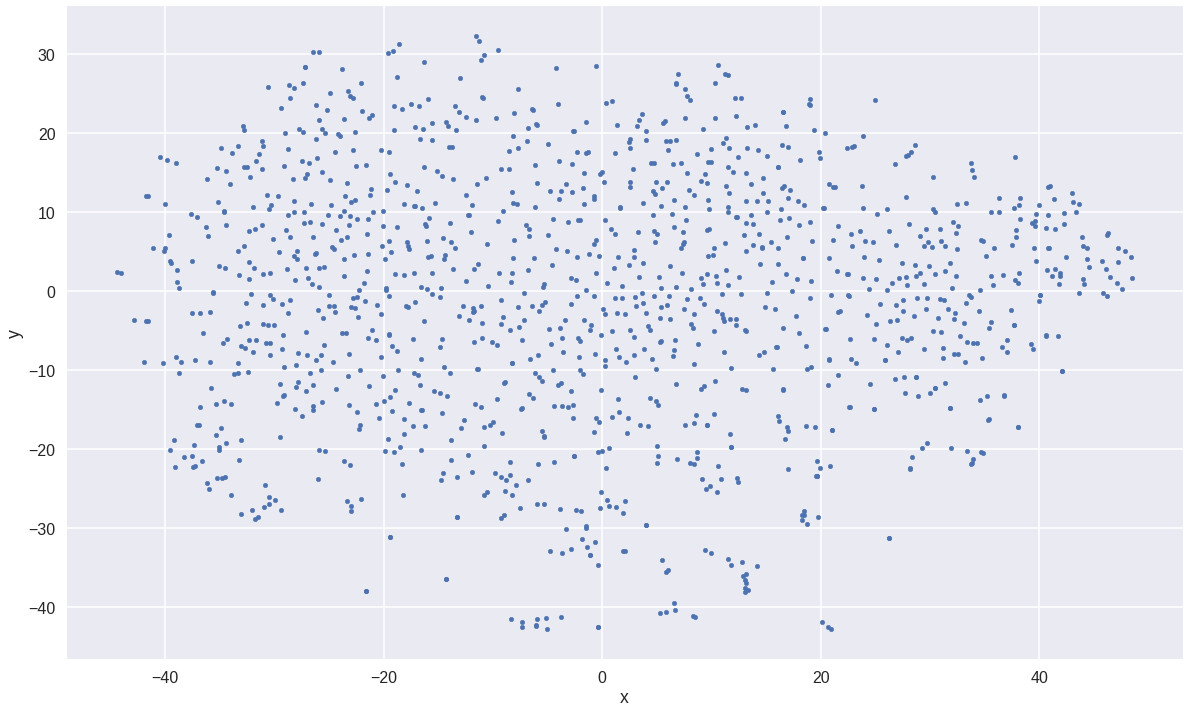

In [27]:
import pandas as pd
import seaborn as sns
sns.set_context("poster")

points = pd.DataFrame(words_and_coords, columns=["word", "x", "y"])
points.plot.scatter("x", "y", s=20, figsize=(20, 12));

In [0]:
def zoom_in(x_bounds, y_bounds):
    filtered_points = points[(points.x >= x_bounds[0]) & (points.x <= x_bounds[1]) & (points.y >= y_bounds[0]) & (points.y <= y_bounds[1])]
    
    ax = filtered_points.plot.scatter("x", "y", s=40, figsize=(10, 8))
    for i, point in filtered_points.iterrows():
        ax.text(point.x+0.005, point.y+0.005, point.word, fontsize=14)

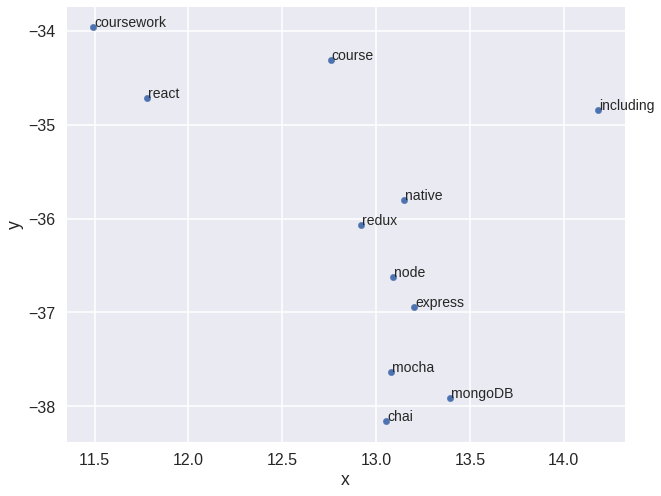

In [42]:
zoom_in(x_bounds=(10.0, 20.0), y_bounds=(-40.0, -30.0))